# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_f = pd.read_csv("ANSUR II FEMALE Public.csv")

In [6]:
df_m = pd.read_csv("ANSUR II MALE Public.csv",encoding='latin1')

In [7]:
df_f = df_f.rename(columns= {"SubjectId" : "subjectid"})

In [8]:
df = pd.concat([df_m,df_f])

In [9]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [10]:
df.select_dtypes(include = "object").describe().T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [11]:
df.drop(columns = ["Date","Ethnicity","PrimaryMOS","Heightin","Weightlbs","SubjectNumericRace","subjectid","Installation","Branch","Component"],axis = 1,inplace=True)

In [12]:
df.Gender = df.Gender.map({"Male":1,"Female":0})

In [13]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [14]:
df.shape

(6068, 98)

In [14]:
df = df[(df.DODRace < 4)]

In [15]:
df[df.duplicated()]

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference


In [79]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'wristcircumference', 'wristheight', 'Gender', 'Installation',
       'Component', 'Branch', 'SubjectsBirthLocation', 'DODRace', 'Age',
       'WritingPreference'],
      dtype='object', length=101)

In [16]:
df2 = df.copy()

In [17]:
df2 = pd.get_dummies(data=df2, drop_first=True)

In [18]:
df2.shape

(5769, 233)

In [19]:
df.shape

(5769, 98)

In [24]:
lst = df2.columns

In [ ]:
#def outlier_report(df, cols, whisker=3): # outlier değerleri tespit etmek için. outlier ları silmeye gerek görmedim. 
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T
res = outlier_report(df, lst)

<AxesSubplot:xlabel='DODRace', ylabel='count'>

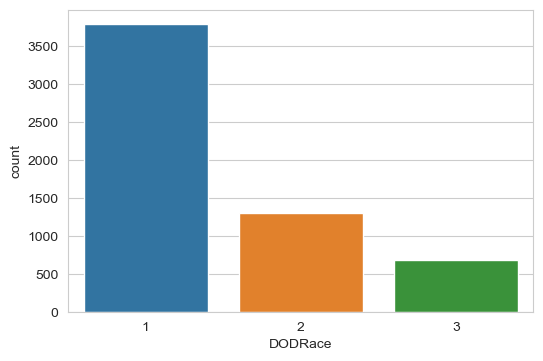

In [20]:
sns.countplot(df2.DODRace)


In [21]:
df2.DODRace = df2.DODRace.map({1:"White",2:"Black",3:"Hispanic"})

In [22]:
df.DODRace = df.DODRace.map({1:"White",2:"Black",3:"Hispanic"})

In [23]:
df = df.reset_index(drop=True)

In [24]:
df2 = df2.reset_index(drop=True)

In [34]:
df.to_csv("soldier_race_without_dummies.csv",index=False)

In [35]:
df2.to_csv("soldier_race_with_dummies.csv",index=False)

In [3]:
df = pd.read_csv("soldier_race_without_dummies.csv")

In [4]:
df2 = pd.read_csv("soldier_race_with_dummies.csv")

In [148]:
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,DODRace,Age,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Azerbaijan,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Belize,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Cape Verde,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesot

## Explore Data

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
X=df2.drop(["DODRace"], axis=1)
y=df2["DODRace"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

<IPython.core.display.Javascript object>

In [40]:
#scaler = MinMaxScaler()

In [41]:
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## 1. Logistic model

### Vanilla Logistic Model

In [8]:
from sklearn.linear_model import LogisticRegression

In [60]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

In [33]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [11]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[295  19  11]
 [ 12 132  26]
 [ 18 126 804]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91       325
    Hispanic       0.48      0.78      0.59       170
       White       0.96      0.85      0.90       948

    accuracy                           0.85      1443
   macro avg       0.78      0.84      0.80      1443
weighted avg       0.89      0.85      0.86      1443


Train_Set
[[ 910   34   29]
 [  18  428   63]
 [  67  332 2445]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92       973
    Hispanic       0.54      0.84      0.66       509
       White       0.96      0.86      0.91      2844

    accuracy                           0.87      4326
   macro avg       0.81      0.88      0.83      4326
weighted avg       0.90      0.87      0.88      4326



In [12]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}
# hispaniclere özel skor almak istiyoruz. Bu yüzden make scorer kullandım

In [57]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# crossvalidate ve vanilla model uyumlu.

test_f1_Hispanic           0.611416
test_precision_Hispanic    0.505895
test_recall_Hispanic       0.774196
dtype: float64

<Figure size 1200x800 with 0 Axes>

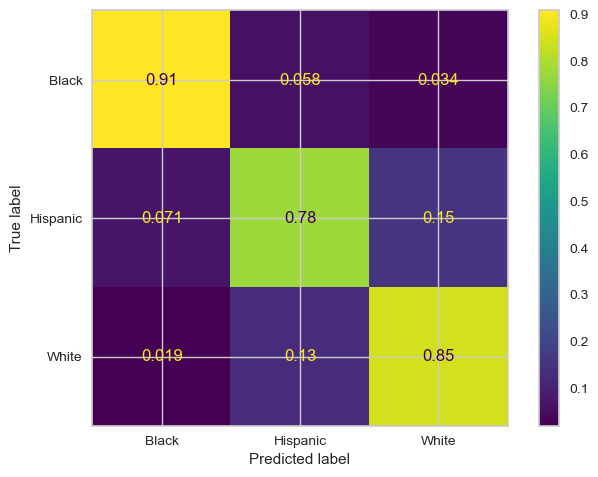

In [59]:
plt.figure(figsize=(12,8))
plot_confusion_matrix(pipe_log_model, X_test, y_test,normalize="true")

### Logistic Model GridsearchCV

In [13]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [16]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [64]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
#conda install -c conda-forge yellowbrick

In [65]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [66]:
log_model_grid.best_score_

0.7761211415259173

In [67]:
X.shape

(5769, 232)

In [68]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[295  19  11]
 [ 12 132  26]
 [ 18 126 804]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91       325
    Hispanic       0.48      0.78      0.59       170
       White       0.96      0.85      0.90       948

    accuracy                           0.85      1443
   macro avg       0.78      0.84      0.80      1443
weighted avg       0.89      0.85      0.86      1443


Train_Set
[[ 910   34   29]
 [  18  428   63]
 [  67  332 2445]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92       973
    Hispanic       0.54      0.84      0.66       509
       White       0.96      0.86      0.91      2844

    accuracy                           0.87      4326
   macro avg       0.81      0.88      0.83      4326
weighted avg       0.90      0.87      0.88      4326



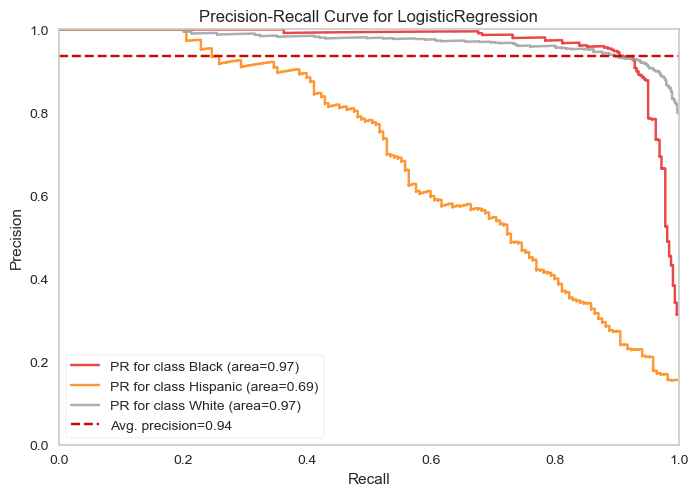

In [69]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',C=1,penalty="l2", solver="lbfgs" max_iter=1000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [70]:
viz.score_#["Hispanic"]

{'Black': 0.968213596213153,
 'Hispanic': 0.6945808528439368,
 'White': 0.9720405002158662,
 'micro': 0.9355808245949853}

In [71]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Lojistic Regression solver "liblenear" for small dataset

In [134]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)

In [73]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[301   8  16]
 [ 10 111  49]
 [ 16  52 880]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92       325
    Hispanic       0.65      0.65      0.65       170
       White       0.93      0.93      0.93       948

    accuracy                           0.90      1443
   macro avg       0.83      0.84      0.83      1443
weighted avg       0.90      0.90      0.90      1443


Train_Set
[[ 913   14   46]
 [  25  351  133]
 [  48  132 2664]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93       973
    Hispanic       0.71      0.69      0.70       509
       White       0.94      0.94      0.94      2844

    accuracy                           0.91      4326
   macro avg       0.86      0.85      0.86      4326
weighted avg       0.91      0.91      0.91      4326



In [74]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.666566
test_precision_Hispanic    0.677100
test_recall_Hispanic       0.658275
dtype: float64

In [ ]:
# l1 ile kullanımdan dolayı değerler azalmış olabilir.

## 2. SVC

### Vanilla SVC model 

In [75]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [76]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[291  20  14]
 [  9 129  32]
 [ 15 140 793]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       325
    Hispanic       0.45      0.76      0.56       170
       White       0.95      0.84      0.89       948

    accuracy                           0.84      1443
   macro avg       0.77      0.83      0.79      1443
weighted avg       0.88      0.84      0.85      1443


Train_Set
[[ 899   35   39]
 [  21  421   67]
 [  55  385 2404]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       973
    Hispanic       0.50      0.83      0.62       509
       White       0.96      0.85      0.90      2844

    accuracy                           0.86      4326
   macro avg       0.79      0.87      0.81      4326
weighted avg       0.90      0.86      0.87      4326



In [77]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# crosvalidate ile vanilla model uyumlu.

test_f1_Hispanic           0.576983
test_precision_Hispanic    0.464409
test_recall_Hispanic       0.764392
dtype: float64

###  SVC Model GridsearchCV

In [78]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [79]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [80]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [81]:
svm_model_grid.best_params_

{'svc__C': 3, 'svc__gamma': 'scale'}

In [82]:
svm_model_grid.best_score_

0.7623956513298389

In [83]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[298  17  10]
 [ 10 131  29]
 [ 16 121 811]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       325
    Hispanic       0.49      0.77      0.60       170
       White       0.95      0.86      0.90       948

    accuracy                           0.86      1443
   macro avg       0.79      0.85      0.81      1443
weighted avg       0.89      0.86      0.87      1443


Train_Set
[[ 913   25   35]
 [  17  437   55]
 [  48  311 2485]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94       973
    Hispanic       0.57      0.86      0.68       509
       White       0.97      0.87      0.92      2844

    accuracy                           0.89      4326
   macro avg       0.82      0.89      0.84      4326
weighted avg       0.91      0.89      0.89      4326



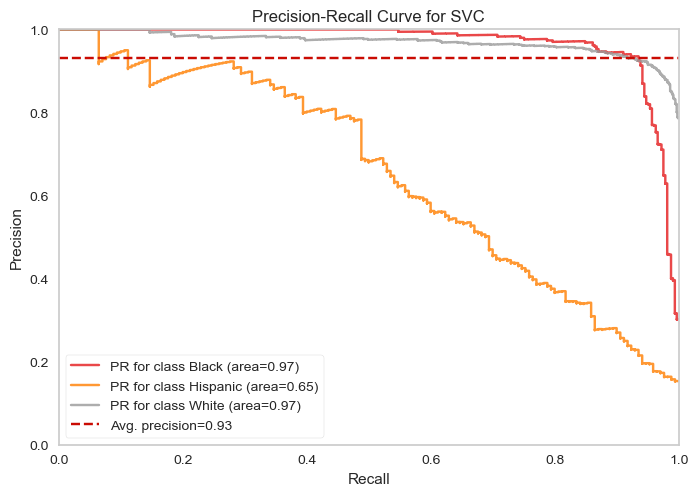

In [84]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [85]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [17]:
from sklearn.preprocessing import OrdinalEncoder
# get dıummies yapılmamış data da ordinal encoder kullanmak RF modelde mantıklı. 

In [18]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [19]:
cat = X2.select_dtypes("object").columns
cat

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [20]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1,90.0,21,2.0


In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.25, random_state=101, stratify =y)

### Vanilla RF Model

In [22]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [87]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [88]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[235   0  90]
 [ 13   7 150]
 [ 12   3 933]]
              precision    recall  f1-score   support

       Black       0.90      0.72      0.80       325
    Hispanic       0.70      0.04      0.08       170
       White       0.80      0.98      0.88       948

    accuracy                           0.81      1443
   macro avg       0.80      0.58      0.59      1443
weighted avg       0.81      0.81      0.77      1443


Train_Set
[[ 973    0    0]
 [   0  509    0]
 [   0    0 2844]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       973
    Hispanic       1.00      1.00      1.00       509
       White       1.00      1.00      1.00      2844

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [89]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_f1_Hispanic           0.074237
test_precision_Hispanic    0.756667
test_recall_Hispanic       0.039255
dtype: float64

### RF Model GridsearchCV

In [95]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16] ,'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]}

In [96]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [97]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'max_features': ['auto', None, 15, 20],
                         'min_samples_split': [18, 20, 22],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [98]:
rf_grid_model.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 22,
 'n_estimators': 500}

In [99]:
rf_grid_model.best_score_

0.35165987186953995

In [100]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[268  10  47]
 [ 21  56  93]
 [ 44  67 837]]
              precision    recall  f1-score   support

       Black       0.80      0.82      0.81       325
    Hispanic       0.42      0.33      0.37       170
       White       0.86      0.88      0.87       948

    accuracy                           0.80      1443
   macro avg       0.69      0.68      0.68      1443
weighted avg       0.79      0.80      0.80      1443


Train_Set
[[ 935    6   32]
 [   6  464   39]
 [  42  109 2693]]
              precision    recall  f1-score   support

       Black       0.95      0.96      0.96       973
    Hispanic       0.80      0.91      0.85       509
       White       0.97      0.95      0.96      2844

    accuracy                           0.95      4326
   macro avg       0.91      0.94      0.92      4326
weighted avg       0.95      0.95      0.95      4326



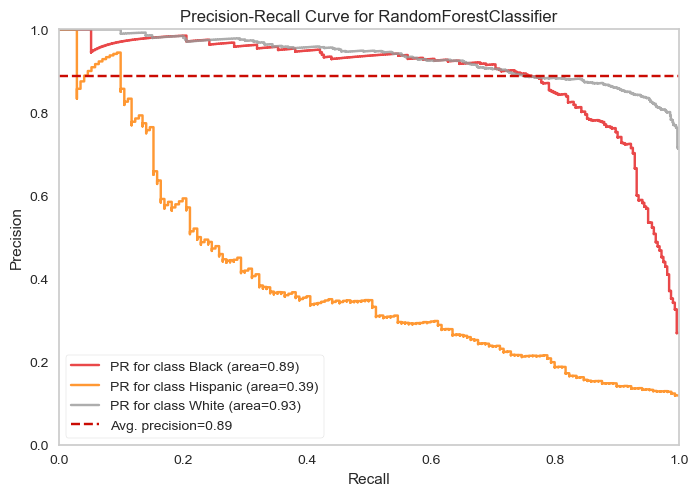

In [101]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [102]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [23]:
xgb_model = XGBClassifier(random_state=101)

In [24]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([0.50703235, 1.48201439, 0.50703235, ..., 0.50703235, 1.48201439,
       0.50703235])

In [19]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

[12:55:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=101, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [22]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[282   5  38]
 [ 15  74  81]
 [ 23  26 899]]
              precision    recall  f1-score   support

       Black       0.88      0.87      0.87       325
    Hispanic       0.70      0.44      0.54       170
       White       0.88      0.95      0.91       948

    accuracy                           0.87      1443
   macro avg       0.82      0.75      0.78      1443
weighted avg       0.86      0.87      0.86      1443


Train_Set
[[ 973    0    0]
 [   0  509    0]
 [   0    0 2844]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       973
    Hispanic       1.00      1.00      1.00       509
       White       1.00      1.00      1.00      2844

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [25]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[13:00:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

test_f1_Hispanic           0.562264
test_precision_Hispanic    0.706041
test_recall_Hispanic       0.469725
dtype: float64

### XGBoost Model GridsearchCV

In [35]:
comp1 = pd.DataFrame(classes_weights)

comp1["label"]= y_train2.reset_index(drop=True)
comp1.groupby("label")[0].value_counts()

label     0       
Black     1.482014     973
Hispanic  2.833006     509
White     0.507032    2844
Name: 0, dtype: int64

In [37]:
param_grid = {"n_estimators":[64,100,128,300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [40]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[13:30:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [42]:
xgb_grid_model.best_score_

0.6385167928557561

In [43]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[285  17  23]
 [ 16 108  46]
 [ 45 132 771]]
              precision    recall  f1-score   support

       Black       0.82      0.88      0.85       325
    Hispanic       0.42      0.64      0.51       170
       White       0.92      0.81      0.86       948

    accuracy                           0.81      1443
   macro avg       0.72      0.78      0.74      1443
weighted avg       0.84      0.81      0.82      1443


Train_Set
[[ 916   23   34]
 [  11  449   49]
 [  74  305 2465]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       973
    Hispanic       0.58      0.88      0.70       509
       White       0.97      0.87      0.91      2844

    accuracy                           0.89      4326
   macro avg       0.82      0.90      0.85      4326
weighted avg       0.91      0.89      0.89      4326



In [47]:
from yellowbrick.classifier import PrecisionRecallCurve

[13:40:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


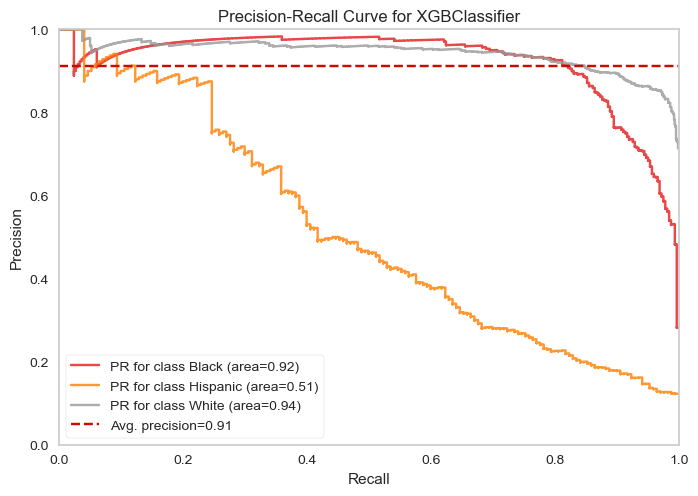

In [48]:
model = XGBClassifier(random_state=101, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [49]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

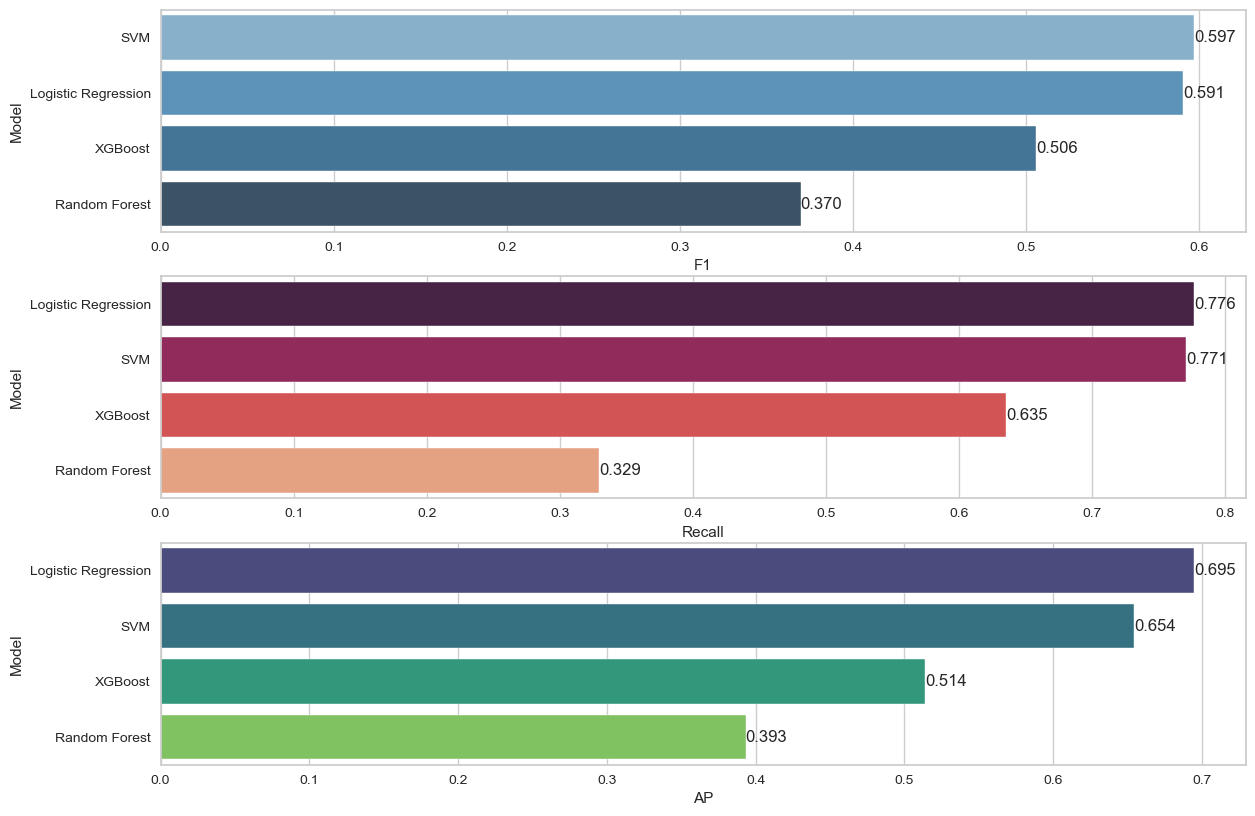

In [106]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="rocket")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="viridis")
labels(ax)
plt.show()

In [ ]:
# Recall değerler üzerinden alınan skorlar karşılaştırıldığında svc ve logistic model birbirine çok yakın değerlere sahip. 
# Ancak maliyet ve zaman açısından Logistic model seçmek mantıklı.

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
# Dengesiz datayı kendi yöntemlerimizle dengeli hale getirmek ve deneyip skorlarda anlamlı değişiklik elde edilebiliyor mu diye bakmak için kullandım.

##  Smote implement

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [26]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [28]:
y_resampled_over.value_counts()

White       2844
Hispanic    1200
Black        973
Name: DODRace, dtype: int64

In [29]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [30]:
y_resampled_under.value_counts()

White       2500
Black        973
Hispanic     509
Name: DODRace, dtype: int64

In [31]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [32]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black        973
Name: DODRace, dtype: int64

In [33]:
y_train.value_counts()

White       2844
Black        973
Hispanic     509
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [34]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [35]:
smote_pipeline = imbpipeline(steps=operations)

In [36]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [37]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[297  17  11]
 [ 12 122  36]
 [ 18  93 837]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91       325
    Hispanic       0.53      0.72      0.61       170
       White       0.95      0.88      0.91       948

    accuracy                           0.87      1443
   macro avg       0.79      0.84      0.81      1443
weighted avg       0.89      0.87      0.88      1443


Train_Set
[[ 919   21   33]
 [  28  383   98]
 [  70  247 2527]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       973
    Hispanic       0.59      0.75      0.66       509
       White       0.95      0.89      0.92      2844

    accuracy                           0.89      4326
   macro avg       0.81      0.86      0.83      4326
weighted avg       0.90      0.89      0.89      4326



In [38]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.607251
test_precision_Hispanic    0.542157
test_recall_Hispanic       0.691529
dtype: float64

In [ ]:
#Değerler; Vanilla/Grid SearcCV Logistic model değerlerine hala uzak. 

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# Multiclass bir target olduğu için Hispaniclerin tespitinde anlamlı feature ları tespit etmek maksadıyla kullandım. 

In [30]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l2", solver='lbfgs')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101)

In [49]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[295  19  11]
 [ 12 132  26]
 [ 18 126 804]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91       325
    Hispanic       0.48      0.78      0.59       170
       White       0.96      0.85      0.90       948

    accuracy                           0.85      1443
   macro avg       0.78      0.84      0.80      1443
weighted avg       0.89      0.85      0.86      1443


Train_Set
[[ 910   34   29]
 [  18  428   63]
 [  67  332 2445]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92       973
    Hispanic       0.54      0.84      0.66       509
       White       0.96      0.86      0.91      2844

    accuracy                           0.87      4326
   macro avg       0.81      0.88      0.83      4326
weighted avg       0.90      0.87      0.88      4326



In [47]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

In [45]:
shap_values

[array([[-4.20422256e+00,  1.12622051e+00,  9.38871078e-01, ...,
          0.00000000e+00, -3.67620331e-02, -7.37523310e-03],
        [ 8.29780768e-02,  3.30249518e+01,  3.39879530e+00, ...,
          0.00000000e+00, -3.67620331e-02, -7.37523310e-03],
        [ 1.32764923e+00,  6.36216941e+01,  1.28285048e+01, ...,
          0.00000000e+00, -3.67620331e-02, -7.37523310e-03],
        ...,
        [-9.32120396e+00, -4.44433956e+01, -7.26087632e+00, ...,
          0.00000000e+00, -3.67620331e-02, -7.37523310e-03],
        [-9.73609435e+00, -1.64506314e+01,  2.98880793e+00, ...,
          0.00000000e+00, -3.67620331e-02, -7.37523310e-03],
        [-8.85099486e-01, -3.27254943e+01, -1.58706111e+01, ...,
          0.00000000e+00, -3.67620331e-02, -7.37523310e-03]]),
 array([[-10.84759204,   0.47005807,   0.35560487, ...,   0.        ,
          -0.03538618,   0.06911922],
        [  0.21409721,  13.78384155,   1.2873207 , ...,   0.        ,
          -0.03538618,   0.06911922],
        [  3.

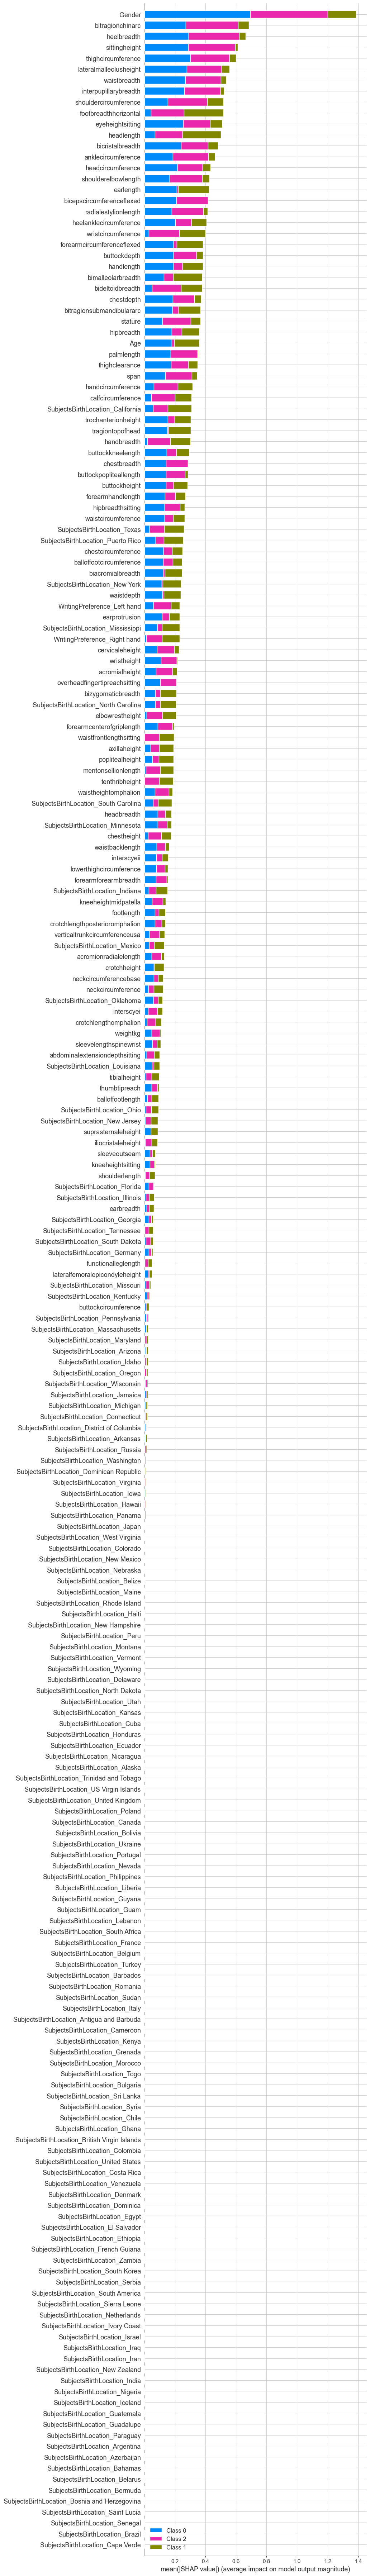

In [48]:
shap.summary_plot(shap_values, X_train_scaled,max_display=300,feature_names = X.columns)

In [54]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [53]:
df2.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'SubjectsBirthLocation_Venezuela', 'SubjectsBirthLocation_Vermont', 'SubjectsBirthLocation_Virginia', 'SubjectsBirthLocation_Washington', 'SubjectsBirthLocation_West Virginia', 'SubjectsBirthLocation_Wisconsin', 'SubjectsBirthLocation_Wyoming', 'SubjectsBirthLocation_Zambia', 'WritingPreference_Left hand', 'WritingPreference_Right hand'], dtype='object', length=233)

In [56]:
hispanic = ['footbreadthhorizontal',  'earlength',  'wristcircumference', 'headlength', 'handlength',
            'bideltoidbreadth',  'bimalleolarbreadth', 'forearmcircumferenceflexed', 'bitragionchinarc', 'hipbreadth', 'SubjectsBirthLocation_California',
            'tragiontopofhead', 'handbreadth', 'SubjectsBirthLocation_Texas','SubjectsBirthLocation_Puerto Rico', 'biacromialbreadth', 'SubjectsBirthLocation_New York', 
            'waistdepth', 'Age','SubjectsBirthLocation_Mississippi','SubjectsBirthLocation_North Carolina','SubjectsBirthLocation_South Carolina','WritingPreference_Right hand',
            'bizygomaticbreadth','elbowrestheight','waistfrontlengthsitting','axillaheight','poplitealheight','tenthribheight','crotchheight','neckcircumference',
            'SubjectsBirthLocation_Indiana','suprasternaleheight','SubjectsBirthLocation_Ohio','SubjectsBirthLocation_New Jersey']

In [57]:
X3 = df2[hispanic]
y = df2.DODRace

In [58]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.25, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [61]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101, C=1.8,
                                                                    penalty="l1", solver='saga'))] # l1 lasso kullanılmalı, l2 kullanılmaz
pipe_shap_model = Pipeline(steps=operations)

In [62]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=1.8, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='saga'))])

In [63]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[274  20  31]
 [ 17 125  28]
 [105 162 681]]
              precision    recall  f1-score   support

       Black       0.69      0.84      0.76       325
    Hispanic       0.41      0.74      0.52       170
       White       0.92      0.72      0.81       948

    accuracy                           0.75      1443
   macro avg       0.67      0.77      0.70      1443
weighted avg       0.81      0.75      0.76      1443


Train_Set
[[ 800   66  107]
 [  49  369   91]
 [ 293  505 2046]]
              precision    recall  f1-score   support

       Black       0.70      0.82      0.76       973
    Hispanic       0.39      0.72      0.51       509
       White       0.91      0.72      0.80      2844

    accuracy                           0.74      4326
   macro avg       0.67      0.76      0.69      4326
weighted avg       0.80      0.74      0.76      4326



In [64]:
X3.shape
# 233 feature dan 35 e indirilmiş olmasına rağmen skorlar Logistic seviyesinde. 

(5769, 35)

In [ ]:
# Hispanicler 1 sınıfı Black ve white lar 0 sınıfı olacak şekilde binary e çevirip denenebilir.

In [ ]:
# Logistic model veya shap model deploy edilibilir.